# Task 11 – Classification Algorithms I

## 1. Data Exploration

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv") 
print("First 5 rows:")
display(df.head())
#Dataset shape
print("Shape of dataset:", df.shape)

#Data types + missing values
print("\nInfo:")
df.info()
print("\nMissing values:\n", df.isnull().sum())

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Shape of dataset: (768, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diabetes

## 2. Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Handle missing values (replace 0s with median where invalid)
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero_invalid:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

#Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (614, 8)
Test set size: (154, 8)


## 3A. Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

#Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Predictions
y_pred_lr = log_reg.predict(X_test)

#Evaluation
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

print("Logistic Regression:")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", rec_lr)
print("ROC-AUC:", roc_auc_lr)

Logistic Regression:
Accuracy: 0.7012987012987013
Precision: 0.5869565217391305
Recall: 0.5
ROC-AUC: 0.8127777777777777


## 3B. Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

#Train decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

#Predictions
y_pred_dt = dt.predict(X_test)

#Evaluation
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Classifier:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)
print("F1-Score:", f1_dt)

Decision Tree Classifier:
Accuracy: 0.6818181818181818
Precision: 0.5531914893617021
Recall: 0.48148148148148145
F1-Score: 0.5148514851485149


## 4. Model Evaluation & Comparison

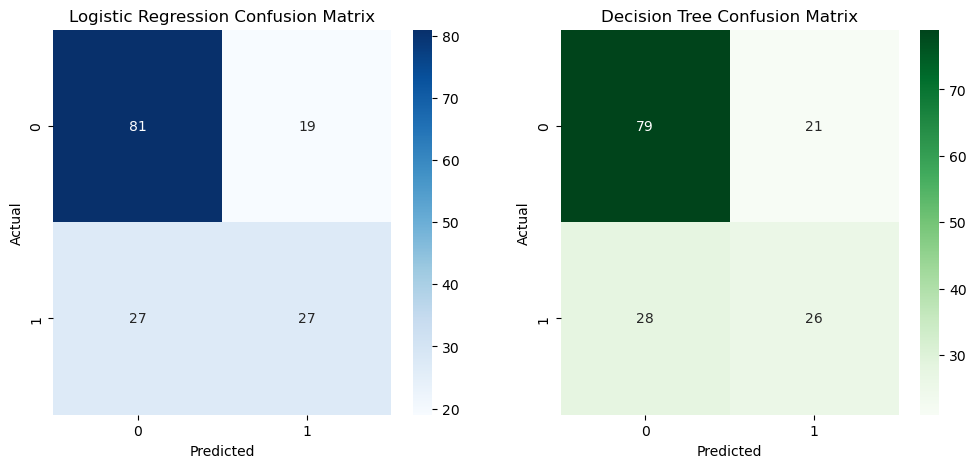


Performance Comparison:
Logistic Regression -> Accuracy: 0.701, Precision: 0.587, Recall: 0.500, ROC-AUC: 0.813
Decision Tree -> Accuracy: 0.682, Precision: 0.553, Recall: 0.481, F1: 0.515


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

#Performance comparison
print("\nPerformance Comparison:")
print(f"Logistic Regression -> Accuracy: {acc_lr:.3f}, Precision: {prec_lr:.3f}, Recall: {rec_lr:.3f}, ROC-AUC: {roc_auc_lr:.3f}")
print(f"Decision Tree -> Accuracy: {acc_dt:.3f}, Precision: {prec_dt:.3f}, Recall: {rec_dt:.3f}, F1: {f1_dt:.3f}")